# Projekt #1

## Deluppgfit #1

Implementera de analytiska lösningarna

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [26]:
def anal_sol(t, w_0, w, y):
    if w_0 == w:
        d_1 = 0
        
        theta_2 = d_1*np.cos(w_0*t) + ((y*w_0)/2)*t*np.sin(w_0*t)
        return theta_2
    else:
        c_1 = -((y*w_0**2)/(w_0**2-w**2))
        c_2 = 0
    
        theta_1 = c_1*np.cos(w_0*t) + c_2*np.sin(w_0*t) + (y*w_0**2*np.cos(w*t))/(w_0**2-w**2)
        return theta_1

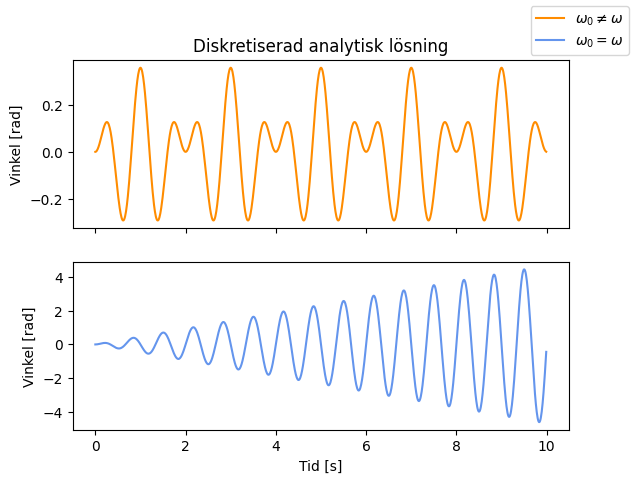

In [32]:
t = np.arange(0, 10, (10/1000))

w1 = 2*np.pi
w_01 = 3*np.pi
y1 = 0.1
theta1 = anal_sol(t, w_01, w1, y1)

w2 = 3*np.pi
w_02 = 3*np.pi
y2 = 0.1
theta2 = anal_sol(t, w_02, w2, y2)

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(t, theta1, color='darkorange', label='$\omega_0 \\neq \omega$')
ax2.plot(t, theta2, color='cornflowerblue', label='$\omega_0 = \omega$')
ax2.set_xlabel('Tid [s]')
ax1.set_ylabel('Vinkel [rad]')
ax2.set_ylabel('Vinkel [rad]')
ax1.set_title('Diskretiserad analytisk lösning')
fig.legend()

## Deluppgift 2

Implementera RK4

In [ ]:
class RK4_pendulum():

    def __init__(self, **kwargs):
        self.t = kwargs['time']
        self.N = kwargs['timesteps']
        self.theta = kwargs['angles']
        self.w_0 = ['omegaZero']
        self.y = kwargs['gamma']
        self.w = kwargs['omega']
        self.h = self.t.max()/self.N
        self.t_0 = kwargs['inittime']
        self.theta_0 = kwargs['initagnle']

    def f(self):
        -self.w_0**2*self.theta*t + ((self.y*self.w_0**2)/t)*np.sin(self.w*t)

    def k1(self):

    def k2(self):

    def k3(self):

    def k4(self):

    def RK4(self):

    def solve(self):